### Name: Heet Dhanuka
### Roll No.: 34
### Batch: B2

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

MAKE DATASETS

In [2]:
def generate_datasets():
    blobs_X, blobs_y = make_blobs(n_samples=1000, centers=2, random_state=42)
    moons_X, moons_y = make_moons(n_samples=1000, noise=0.1, random_state=42)
    circles_X, circles_y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
    return (blobs_X, blobs_y), (moons_X, moons_y), (circles_X, circles_y)

Visualizing datasets

In [3]:
def visualize_dataset(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=15)
    plt.show()

In [4]:
def visualize_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    pred = model.forward(grid_points)
    pred = (pred > 0.5).astype(int)
    pred = pred.reshape(xx.shape)

    plt.contourf(xx, yy, pred, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='g', marker='o', s=25)
    plt.show()

NEURAL NETWORK

In [5]:
class Layer:
    def __init__(self, input_size, output_size, activation='sigmoid'):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros((1, output_size))
        self.activation = activation

    def forward(self, inputs):
        self.inputs = inputs
        self.z = np.dot(inputs, self.weights) + self.bias

        if self.activation == 'sigmoid':
            self.output = 1 / (1 + np.exp(-self.z))
        elif self.activation == 'softmax':
            exp_scores = np.exp(self.z)
            self.output = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return self.output

    def backward(self, output_gradient, learning_rate):
        activation_gradient = self.output * (1 - self.output)
        activation_gradient *= output_gradient

        weights_gradient = np.dot(self.inputs.T, activation_gradient)
        input_gradient = np.dot(activation_gradient, self.weights.T)

        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * np.sum(activation_gradient, axis=0, keepdims=True)

        return input_gradient

In [6]:
class FeedForwardNN:
    def __init__(self):
        self.layers = []

    def add_layer(self, input_size, output_size, activation='sigmoid'):
        layer = Layer(input_size, output_size, activation)
        self.layers.append(layer)

    def forward(self, X):
        output = X
        for layer in self.layers:
            output = layer.forward(output)
        return output

    def backward(self, loss_gradient, learning_rate):
        gradient = loss_gradient
        for layer in reversed(self.layers):
            gradient = layer.backward(gradient, learning_rate)

    def train(self, X, y, epochs, learning_rate=0.01, batch_size=32):
        for epoch in range(epochs):
            total_loss = 0
            for i in range(0, len(X), batch_size):
                batch_X = X[i:i + batch_size]
                batch_y = y[i:i + batch_size]

                predictions = self.forward(batch_X)

                loss = np.mean((predictions - batch_y) ** 2)
                total_loss += loss

                loss_gradient = 2 * (predictions - batch_y) / batch_size
                self.backward(loss_gradient, learning_rate)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {total_loss/len(X)}")

Dataset 1
Epoch 0, Loss: 0.007813465017143927
Epoch 100, Loss: 0.0026596603841234105
Epoch 200, Loss: 0.0005707728278648864
Epoch 300, Loss: 0.0002900769301270843
Epoch 400, Loss: 0.00019021137854445663
Epoch 500, Loss: 0.0001402393620459937
Epoch 600, Loss: 0.00011054961739512134
Epoch 700, Loss: 9.098466147074621e-05
Epoch 800, Loss: 7.716595790473139e-05
Epoch 900, Loss: 6.690881315470082e-05
Accuracy: 1.0


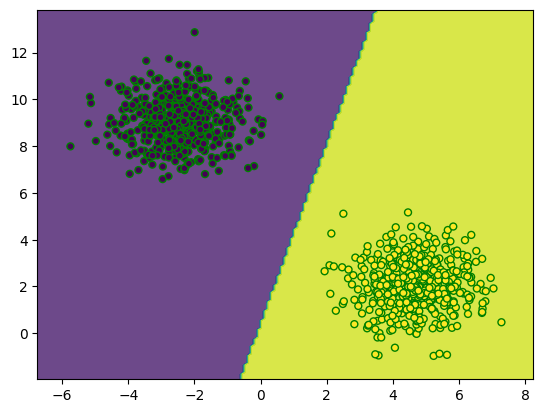

Dataset 2
Epoch 0, Loss: 0.007813525483385028
Epoch 100, Loss: 0.007812886859919755
Epoch 200, Loss: 0.007811530819586231
Epoch 300, Loss: 0.007802223155106713
Epoch 400, Loss: 0.007737835561544748
Epoch 500, Loss: 0.007353606652462372
Epoch 600, Loss: 0.006077039762815332
Epoch 700, Loss: 0.00460245245767146
Epoch 800, Loss: 0.00379533397999604
Epoch 900, Loss: 0.003368992599279386
Accuracy: 0.84


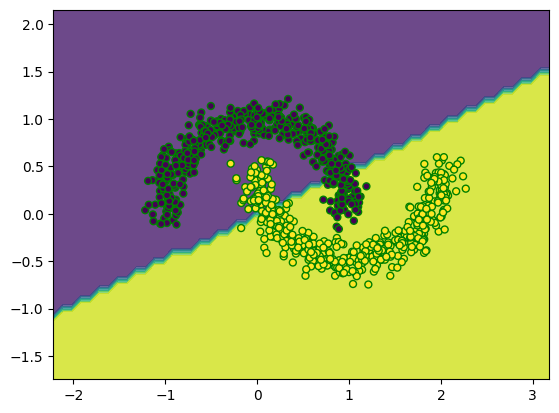

Dataset 3
Epoch 0, Loss: 0.007813982062538673
Epoch 100, Loss: 0.007813077129200595
Epoch 200, Loss: 0.007813076557573257
Epoch 300, Loss: 0.007813076386820732
Epoch 400, Loss: 0.007813076222165831
Epoch 500, Loss: 0.007813076061871128
Epoch 600, Loss: 0.007813075905790935
Epoch 700, Loss: 0.00781307575378998
Epoch 800, Loss: 0.00781307560573667
Epoch 900, Loss: 0.007813075461502937
Accuracy: 0.5


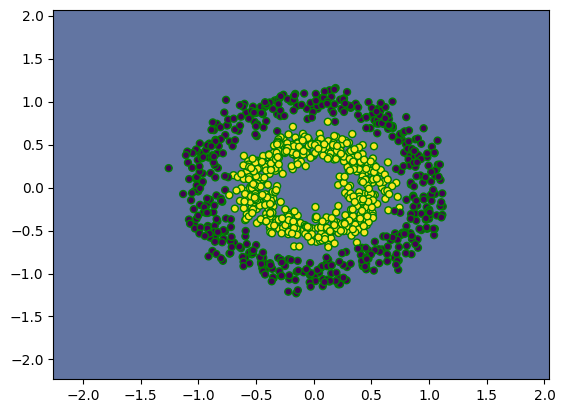

In [7]:
datasets = generate_datasets()
for i, (X, y) in enumerate(datasets):
    print(f"Dataset {i+1}")
    num_classes = len(np.unique(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = FeedForwardNN()
    model.add_layer(input_size=2, output_size=3, activation='sigmoid')
    model.add_layer(input_size=3, output_size=1, activation='sigmoid')
    #model.add_layer(input_size= 1, output_size=1, activation='softmax')

    model.train(X_train, y_train.reshape(-1, 1), epochs=1000, learning_rate=0.01)

    predictions = model.forward(X_test)
    predictions = (predictions > 0.5).astype(int)
    predictions = predictions.reshape(-1)
    print("Accuracy:", accuracy_score(y_test, predictions))

    visualize_decision_boundary(model, X, y)